# Location visualisation
This is a jupyter notebook that shows where each weather stations data is placed. We use the location (lattitude longitude) from the initial webpage and visualise them.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pathlib import Path

%matplotlib inline

In [37]:
# shape file
shp_file = Path.cwd().parent / "input" / "shapes" / "gb_1km.shx"
gdf_map = gpd.read_file(shp_file)
gdf_map.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [39]:
# location of weather stations
location_filename = "location_webpages"
input_location_filepath = Path.cwd().parent / "input" / f"{location_filename}.csv"
df = pd.read_csv(input_location_filepath)
df[["longitude","latitude"]] = df["Location"].str.split(pat=",", n=2,expand=True)


In [40]:
# create geopandas df with location points
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
).to_crs("EPSG:3035")


<Axes: >

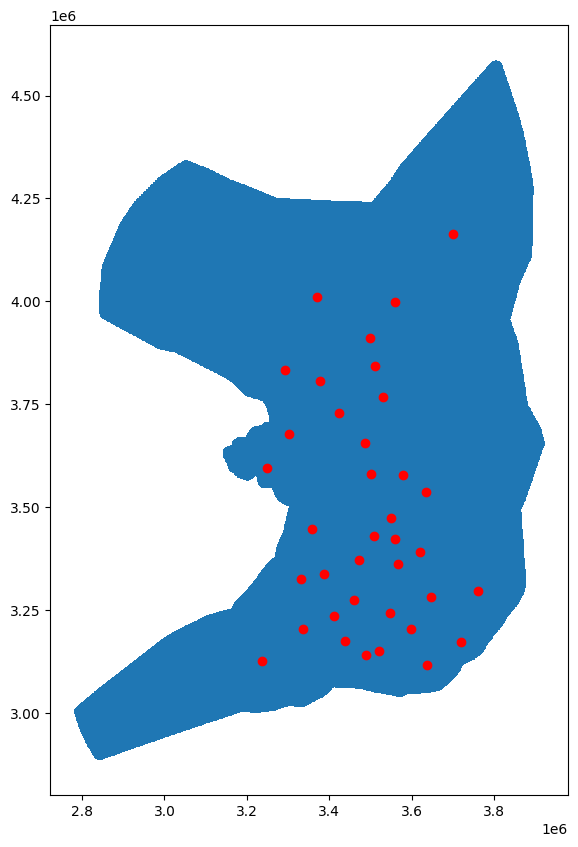

In [ ]:
# combine in a visualisation
fig, ax = plt.subplots(figsize=(10,10))
plt.suptitle('Locations of weather stations in the United Kingdom')
gdf_map.plot(ax=ax, color="green")
gdf.plot(ax=ax,color="red")